## Sample of comments analysis based on external data

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("telesales calls.csv", sep = ";")

In [96]:
df.head()


,cardcode,calldate,Result,ShortComment,LongComment,Found,Interest
0,A.06446,4/9/2019,Παραγγελία,Επανάκληση,ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕ...,1.0,1.0
1,A.01775,4/9/2019,Ενημέρωση,Αντιπρόσωπος μόνο,ΘΕΛΕΙ ΚΑΤΑΛΟΛΟ ΜΕ ΤΑ ΠΡΟΙΟΝΤΑ ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥ...,1.0,0.0
2,A.03996,4/9/2019,Ενημέρωση,Αντιπρόσωπος μόνο,ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥΣΗ ΧΡΗΣΤΟ ΚΑΙ ΘΑ ΔΩΣΕΙ ΠΑΡΑΓΓΕΛ...,1.0,0.0
3,A.04698,4/9/2019,Ενημέρωση,Ανταγωνισμός,ΨΩΝΙΖΕΙ ΑΠΟ ΖΑΦΕΙΡΑΤΟ ΚΑΙ ΔΟΥΛΕΥΕΙ ΤΟ MAMAS CA...,1.0,0.0
4,A.01653,4/9/2019,Ενημέρωση,Κατάλογος προϊόντων,ΘΕΛΕΙ ΔΕΙΓΜΑ ΓΙΑ ΨΩΜΙ oLIKIS ΜΕ ΠΡΟΖΥΜΙ ΠΑΙΡΝΕ...,1.0,0.0


In [97]:
df.columns

Index(['cardcode', 'calldate', 'Result', 'ShortComment', 'LongComment',
       'Found', 'Interest'],
      dtype='object')

In [98]:
fill_df = df[['LongComment',"Found",'Interest']]
print(fill_df.shape)
fill_df.head(20)

(3346, 3)


,LongComment,Found,Interest
0,ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕ...,1.0,1.0
1,ΘΕΛΕΙ ΚΑΤΑΛΟΛΟ ΜΕ ΤΑ ΠΡΟΙΟΝΤΑ ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥ...,1.0,0.0
2,ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥΣΗ ΧΡΗΣΤΟ ΚΑΙ ΘΑ ΔΩΣΕΙ ΠΑΡΑΓΓΕΛ...,1.0,0.0
3,ΨΩΝΙΖΕΙ ΑΠΟ ΖΑΦΕΙΡΑΤΟ ΚΑΙ ΔΟΥΛΕΥΕΙ ΤΟ MAMAS CA...,1.0,0.0
4,ΘΕΛΕΙ ΔΕΙΓΜΑ ΓΙΑ ΨΩΜΙ oLIKIS ΜΕ ΠΡΟΖΥΜΙ ΠΑΙΡΝΕ...,1.0,0.0
5,ΔΕΝ ΑΠΑΝΤΑ ΣΤΟ ΤΗΛ.,0.0,NaN
6,ΕΛΕΙΠΕ Ο ΥΠΕΥΘΥΝΟΣ.,0.0,NaN
7,ΛΑΘΟΣ ΤΗΛ,0.0,NaN
8,ΨΩΝΙΖΕΙ ΑΠΟ ΠΥΡΡΟ ΑΛΛΑ ΘΕΛΕΙ ΚΑΛΥΤΕΡΕΣ ΤΙΜΕΣ. ...,1.0,0.0
9,ΕΝΗΜΕΡΩΘΗΚΕ ΓΙΑ ΝΕΑ ΠΡΟΙΟΝΤΑ ΚΑΙ ΕΠΙΘΥΜΕΙ ΔΕΙΓ...,1.0,0.0


* We keep only the records where the customer was found

In [99]:
df_found = fill_df[(fill_df["Found"] == 1.0)]

In [100]:
df_found.head()

,LongComment,Found,Interest
0,ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕ...,1.0,1.0
1,ΘΕΛΕΙ ΚΑΤΑΛΟΛΟ ΜΕ ΤΑ ΠΡΟΙΟΝΤΑ ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥ...,1.0,0.0
2,ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥΣΗ ΧΡΗΣΤΟ ΚΑΙ ΘΑ ΔΩΣΕΙ ΠΑΡΑΓΓΕΛ...,1.0,0.0
3,ΨΩΝΙΖΕΙ ΑΠΟ ΖΑΦΕΙΡΑΤΟ ΚΑΙ ΔΟΥΛΕΥΕΙ ΤΟ MAMAS CA...,1.0,0.0
4,ΘΕΛΕΙ ΔΕΙΓΜΑ ΓΙΑ ΨΩΜΙ oLIKIS ΜΕ ΠΡΟΖΥΜΙ ΠΑΙΡΝΕ...,1.0,0.0


* Remove the calls that had neutral result

In [101]:
df_interest = df_found[(df_found["Interest"] == 1.0)|(df_found["Interest"] == -1.0) ]

In [102]:
df_interest.head()

,LongComment,Found,Interest
0,ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕ...,1.0,1.0
17,ΘΑ ΚΑΛΕΣΕΙ Ο ΙΔΙΟΣ ΟΤΑΝ ΧΡΕΙΑΣΤΕΙ ΚΑΤΙ 2105621903,1.0,-1.0
18,ΘΑ ΠΑΡΕΙ ΤΗΛ ΑΝ ΧΡΕΙΣΤΕΙ ΚΑΤΙ ΑΠΟ ΤΗΝ ΕΤΑΙΡΕΙΑ...,1.0,-1.0
19,ΣΥΝΕΡΓΑΖΟΤΑΝ ΠΑΛΙΑ ΜΑΖΙ ΜΑΣ ΨΩΝΙΖΕΙ ΜΟΝΟ ΑΠΟ Α...,1.0,-1.0
22,"ΧΟΝΔΡΙΚΗ ΠΩΛΗΣΗ ΠΑΓΩΤΩΜΗΧΑΝΩΝ,",1.0,1.0


In [103]:
df1 =df_interest.replace(to_replace = 1.0,
                 value ="pos")

In [104]:
df1.head()

,LongComment,Found,Interest
0,ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕ...,pos,pos
17,ΘΑ ΚΑΛΕΣΕΙ Ο ΙΔΙΟΣ ΟΤΑΝ ΧΡΕΙΑΣΤΕΙ ΚΑΤΙ 2105621903,pos,-1.0
18,ΘΑ ΠΑΡΕΙ ΤΗΛ ΑΝ ΧΡΕΙΣΤΕΙ ΚΑΤΙ ΑΠΟ ΤΗΝ ΕΤΑΙΡΕΙΑ...,pos,-1.0
19,ΣΥΝΕΡΓΑΖΟΤΑΝ ΠΑΛΙΑ ΜΑΖΙ ΜΑΣ ΨΩΝΙΖΕΙ ΜΟΝΟ ΑΠΟ Α...,pos,-1.0
22,"ΧΟΝΔΡΙΚΗ ΠΩΛΗΣΗ ΠΑΓΩΤΩΜΗΧΑΝΩΝ,",pos,pos


In [105]:
df_final = df1.replace(to_replace = -1.0,
                 value ="neg")

In [106]:
df_final= df_final[["LongComment", "Interest"]]
df_final.head()

,LongComment,Interest
0,ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕ...,pos
17,ΘΑ ΚΑΛΕΣΕΙ Ο ΙΔΙΟΣ ΟΤΑΝ ΧΡΕΙΑΣΤΕΙ ΚΑΤΙ 2105621903,neg
18,ΘΑ ΠΑΡΕΙ ΤΗΛ ΑΝ ΧΡΕΙΣΤΕΙ ΚΑΤΙ ΑΠΟ ΤΗΝ ΕΤΑΙΡΕΙΑ...,neg
19,ΣΥΝΕΡΓΑΖΟΤΑΝ ΠΑΛΙΑ ΜΑΖΙ ΜΑΣ ΨΩΝΙΖΕΙ ΜΟΝΟ ΑΠΟ Α...,neg
22,"ΧΟΝΔΡΙΚΗ ΠΩΛΗΣΗ ΠΑΓΩΤΩΜΗΧΑΝΩΝ,",pos


In [107]:
df_final["Interest"].value_counts()

neg    570
pos    207
Name: Interest, dtype: int64

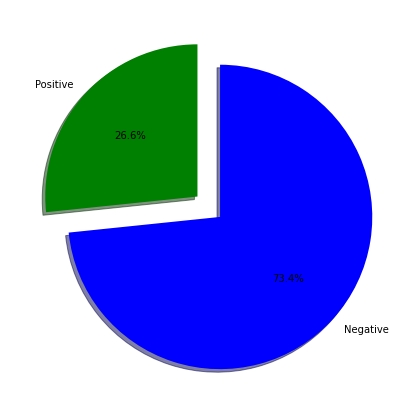

In [108]:
fig=plt.figure(figsize=(7,7))
colors=["green",'blue']
pos=df_final[df_final['Interest']== 'pos']
neg=df_final[df_final['Interest']== 'neg']
ck=[pos['Interest'].count(),neg['Interest'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 90,
                 explode=(0, 0.2))

* Negative reactions are the majority. This is expected since the specific datasets contains records from calls to old customers or to firms which are of unknown condtion

In [109]:
react = df_final.LongComment.values.astype("str")
react

array(['ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕΙ ΔΕΙΓΜΑ ΓΙΑ CHOCOLATIER DELICECOVER SOKOLATA,',
       'ΘΑ ΚΑΛΕΣΕΙ Ο ΙΔΙΟΣ ΟΤΑΝ ΧΡΕΙΑΣΤΕΙ ΚΑΤΙ 2105621903',
       'ΘΑ ΠΑΡΕΙ ΤΗΛ ΑΝ ΧΡΕΙΣΤΕΙ ΚΑΤΙ ΑΠΟ ΤΗΝ ΕΤΑΙΡΕΙΑ....',
       'ΣΥΝΕΡΓΑΖΟΤΑΝ ΠΑΛΙΑ ΜΑΖΙ ΜΑΣ ΨΩΝΙΖΕΙ ΜΟΝΟ ΑΠΟ ΑΝΤΑΓΩΝΙΣΤΗ,ΠΡΟΣ ΤΟ ΠΑΡΟΝ ΔΕΝ ΘΕΛΕΙ  ΣΥΝΕΡΓΑΣΙΑ.',
       'ΧΟΝΔΡΙΚΗ ΠΩΛΗΣΗ ΠΑΓΩΤΩΜΗΧΑΝΩΝ,',
       'δεν ψωνιζει προοιντα απο την εταιρεια  εχει σταματησει και παιρνει μονο απο ανταγωνιστες.(ΜΠΕΞΗΣ)',
       'ΘΑ ΔΩΣΕΙ Ο ΙΔΙΟΣ ΠΑΡΑΓΓΕΛΙΑ ΟΤΑΝ ΧΡΕΙΑΣΤΕΙ.',
       'ΘΑ ΔΩΣΕΙ ΠΑΡΑΓΓΕΛΙΑ Ο ΙΔΙΟΣ ΟΤΑΝ ΧΡΕΑΣΤΕΙ  ΕΙΝΑΙ ΕΝΗΜΕΡΩΜΕΝΟΣ ΓΙΑ ΤΑ ΠΡΟΙΟΝΤΑ ΜΑΣ.',
       'Ο ΠΕΛΑΤΗΣ ΕΝΗΜΕΡΩΘΗΚΕ ΓΙΑ ΝΕΑ ΠΡΟΙΟΝΤΑ ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΓΙΑ ΠΡΩΤΗ ΦΟΡΑ ΜΙΑ mINUTA ΚΑΙ ΖΗΤΗΣΕ ΔΕΙΓΜΑ ΚΑΙ mATCHA TEA ',
       'ΠΑΡΑΓΓΕΛΙΑ ΜΙΑ mINUTA',
       'παιρνει συγκεκριμενα προιοντα και αν χρειαστει κατι θα μας ενημερωσει,',
       'ΔΕΝ ΕΝΔΙΑΦΕΡΕΤΑΙ,',
       'ΠΑΙΡΝΕΙ ΣΥΓΚΕΚΡΙΜΕΝΑ ΠΡΟΙΟΝΤΑ ΚΑΙ ΔΙΝΕΙ ΠΑΡΑΓΓΕΛΙΑ ΟΤΑΝ ΧΡΕΙΑΖΕΤΑΙ,',
       'ΕΝΗΜΕΡΩΩΝΕΤΑΙ ΑΠΟ ΤΟΝ Κ

In [110]:
sentiment_label = df_final.Interest.factorize()
sentiment_label

(array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 

In [111]:
#react = df_final.LongComment.values
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(react)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(react)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [112]:
tokenizer

In [113]:
print(tokenizer.word_index)

{'παραγγελια': 1, 'δεν': 2, 'ενδιαφερεται': 3, 'για': 4, 'θα': 5, 'εδωσε': 6, 'χρειαστει': 7, 'οκ': 8, 'nan': 9, 'δωσει': 10, 'στον': 11, 'ο': 12, 'κατι': 13, 'ιδιος': 14, 'απο': 15, 'αν': 16, 'εμπορο': 17, 'οταν': 18, 'και': 19, 'μας': 20, 'δινει': 21, 'τα': 22, 'πωλητη': 23, 'μονο': 24, 'προιοντα': 25, 'ψωνιζει': 26, 'τον': 27, 'ενδιαφερται': 28, 'χρειαζεται': 29, 'την': 30, 'το': 31, 'εχει': 32, 'με': 33, 'να': 34, 'παιρνει': 35, 'προς': 36, 'ειναι': 37, 'θελει': 38, 'εβδομαδα': 39, 'δενε': 40, 'ενημερωνεται': 41, '1': 42, 'ok': 43, 'ενημερωμενος': 44, 'νουση': 45, 'πυρρο': 46, 'mamas': 47, 'εταιρεια': 48, 'κειμπινο': 49, 'τωρα': 50, 'παρων': 51, 'αυτη': 52, 'δουλεια': 53, 'ενα': 54, 'καλεσει': 55, 'παρον': 56, 'εκεινον': 57, 'ενδιαφερονται': 58, 'η': 59, 'αργοτερα': 60, 'παρει': 61, 'χρειστει': 62, 'μιλαει': 63, 'του': 64, 'αλλη': 65, 'δειγμα': 66, 'chocolatier': 67, 'delicecover': 68, 'τηλ': 69, 'αντωνιου': 70, 'αλλα': 71, 'στην': 72, 'βουδρη': 73, 'μανο': 74, 'καταλογο': 75, 'ιδι

In [114]:
print(react[0])
print(encoded_docs[0])

ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕΙ ΔΕΙΓΜΑ ΓΙΑ CHOCOLATIER DELICECOVER SOKOLATA,
[6, 1, 54, 47, 84, 116, 19, 38, 66, 4, 67, 68, 85]


In [115]:
print(padded_sequence[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   6   1  54  47  84 116  19  38  66   4  67
  68  85]


In [116]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 32)           15264     
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 31,915
Trainable params: 31,915
Non-trainable params: 0
_________________________________________________________________
None


In [117]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs= 5, batch_size=32)

Epoch 1/5
20/20 [==============================] - 4s 94ms/step - loss: 0.6549 - accuracy: 0.6747 - val_loss: 0.5419 - val_accuracy: 0.7692
Epoch 2/5
20/20 [==============================] - 2s 84ms/step - loss: 0.5787 - accuracy: 0.7246 - val_loss: 0.5219 - val_accuracy: 0.7692
Epoch 3/5
20/20 [==============================] - 2s 83ms/step - loss: 0.5373 - accuracy: 0.7246 - val_loss: 0.4573 - val_accuracy: 0.7692
Epoch 4/5
20/20 [==============================] - 2s 83ms/step - loss: 0.4383 - accuracy: 0.7520 - val_loss: 0.3397 - val_accuracy: 0.8333
Epoch 5/5
20/20 [==============================] - 2s 84ms/step - loss: 0.2967 - accuracy: 0.9018 - val_loss: 0.2542 - val_accuracy: 0.9231


- Accuracy of the model is extremely high. This does not mean that this is a good model since the dataset is of small size

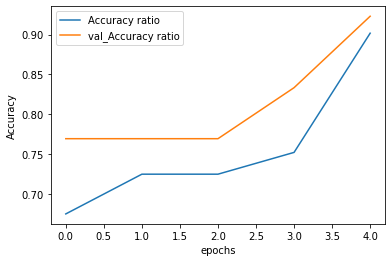

<Figure size 432x288 with 0 Axes>

In [118]:
plt.plot(history.history['accuracy'], label='Accuracy ratio')
plt.plot(history.history['val_accuracy'], label='val_Accuracy ratio')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig("Accuracy plot.png")

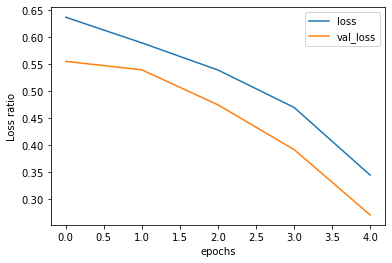

<Figure size 432x288 with 0 Axes>

In [71]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("epochs")
plt.ylabel("Loss ratio")
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [72]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [73]:
test_sentence1 = "εδωσε παραγγελια"
predict_sentiment(test_sentence1)

test_sentence2 = "δεν εδωσε"
predict_sentiment(test_sentence2)

Predicted label:  pos
Predicted label:  neg


### Translate comments to English 

In [ ]:
pip uninstall googletrans


In [ ]:
pip install googletrans == 3.1.0a0

In [ ]:
import googletrans

print(googletrans.LANGUAGES)

In [ ]:
from googletrans import Translator, constants
from pprint import pprint

In [ ]:
translator = Translator()

In [ ]:
result = translator.translate("καλημερα παιδια")

### Save model structure

In [59]:
model_nn_json = model.to_json()
with open("model_nn.json", "w") as json_file:
    json_file.write(model_nn_json)

In [58]:
model_nn_json

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 200], "dtype": "float32", "sparse": false, "ragged": false, "name": "embedding_2_input"}}, {"class_name": "Embedding", "config": {"name": "embedding_2", "trainable": true, "batch_input_shape": [null, 200], "dtype": "float32", "input_dim": 477, "output_dim": 32, "embeddings_initializer": {"class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null}}, "embeddings_regularizer": null, "activity_regularizer": null, "embeddings_constraint": null, "mask_zero": false, "input_length": 200}}, {"class_name": "SpatialDropout1D", "config": {"name": "spatial_dropout1d_2", "trainable": true, "dtype": "float32", "rate": 0.25, "noise_shape": null, "seed": null}}, {"class_name": "LSTM", "config": {"name": "lstm_2", "trainable": true, "dtype": "float32", "return_sequences": false, "return_state": false, "go_backwards": false, "stateful

In [61]:
model.save_weights("model_nn_weights.h5")
print("Saved model to disk")

Saved model to disk
